In [1]:
import pandas as pd
import seaborn as sns
import datetime as datetime
import warnings
import numpy as np 
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

#updated data: https://www.illinoispolicy.org/what-you-need-to-know-about-coronavirus-in-illinois/

/Users/andrewleonard/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [20]:
import pandas as pd
#https://covidtracking.com/data/download
test_stats = pd.read_csv('https://covidtracking.com/data/download/illinois-history.csv')

In [21]:
test_stats.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2020-10-29,IL,A,9945.0,9675.0,56,270.0,NaN,NaN,3030.0,...,7546811,83056,NaN,NaN,NaN,NaN,NaN,0,7542098.0,83056
1,2020-10-28,IL,A,9889.0,9619.0,51,270.0,NaN,NaN,2861.0,...,7463755,70752,NaN,NaN,NaN,NaN,NaN,0,7459042.0,70752
2,2020-10-27,IL,A,9838.0,9568.0,46,270.0,NaN,NaN,2758.0,...,7393003,62074,NaN,NaN,NaN,NaN,NaN,0,7388290.0,62074
3,2020-10-26,IL,A,9792.0,9522.0,17,270.0,NaN,NaN,2638.0,...,7330929,57264,NaN,NaN,NaN,NaN,NaN,0,7326216.0,57264
4,2020-10-25,IL,A,9775.0,9505.0,24,270.0,NaN,NaN,2605.0,...,7273665,72097,NaN,NaN,NaN,NaN,NaN,0,7268952.0,72097


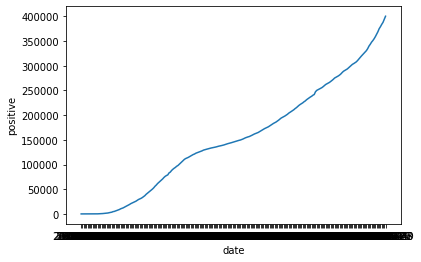

In [24]:
sns.lineplot(x="date", y="positive", data=test_stats)

In [27]:
test_stats['logCases']=np.log(test_stats['positive'])

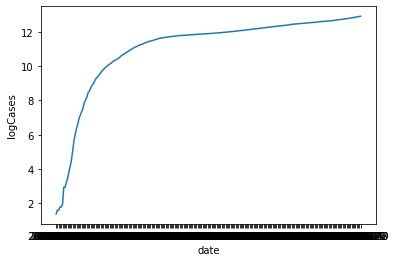

In [28]:
sns.lineplot(x="date", y="logCases", data=test_stats)

In [4]:
test_stats = test_stats[["date", "positiveIncrease", "hospitalizedCurrently", "onVentilatorCurrently", "totalTestResultsIncrease", "deathIncrease"]]


In [5]:
test_stats = test_stats.sort_values(by = 'date')
test_stats = test_stats.reset_index()

In [6]:
test_stats

,index,date,positiveIncrease,hospitalizedCurrently,onVentilatorCurrently,totalTestResultsIncrease,deathIncrease
0,239,2020-03-04,0,NaN,NaN,0,0
1,238,2020-03-05,1,NaN,NaN,42,0
2,237,2020-03-06,0,NaN,NaN,15,0
3,236,2020-03-07,1,NaN,NaN,12,0
4,235,2020-03-08,0,NaN,NaN,0,0
...,...,...,...,...,...,...,...
235,4,2020-10-25,4062,2605.0,214.0,72097,24
236,3,2020-10-26,4729,2638.0,238.0,57264,17
237,2,2020-10-27,4000,2758.0,241.0,62074,46
238,1,2020-10-28,6110,2861.0,243.0,70752,51


In [7]:
pos_rate = test_stats['positiveIncrease']/test_stats['totalTestResultsIncrease']
print(pos_rate[130:])

130    0.024528
131    0.029422
132    0.024854
133    0.031105
134    0.029228
         ...   
235    0.056341
236    0.082582
237    0.064439
238    0.086358
239    0.076611
Length: 110, dtype: float64


In [8]:
pos_rate[-7:].sum()/7

0.07143796326630511

In [9]:
test_stats['pos_rate'] = pos_rate

In [10]:
test_stats['state'] = 'Illinois'

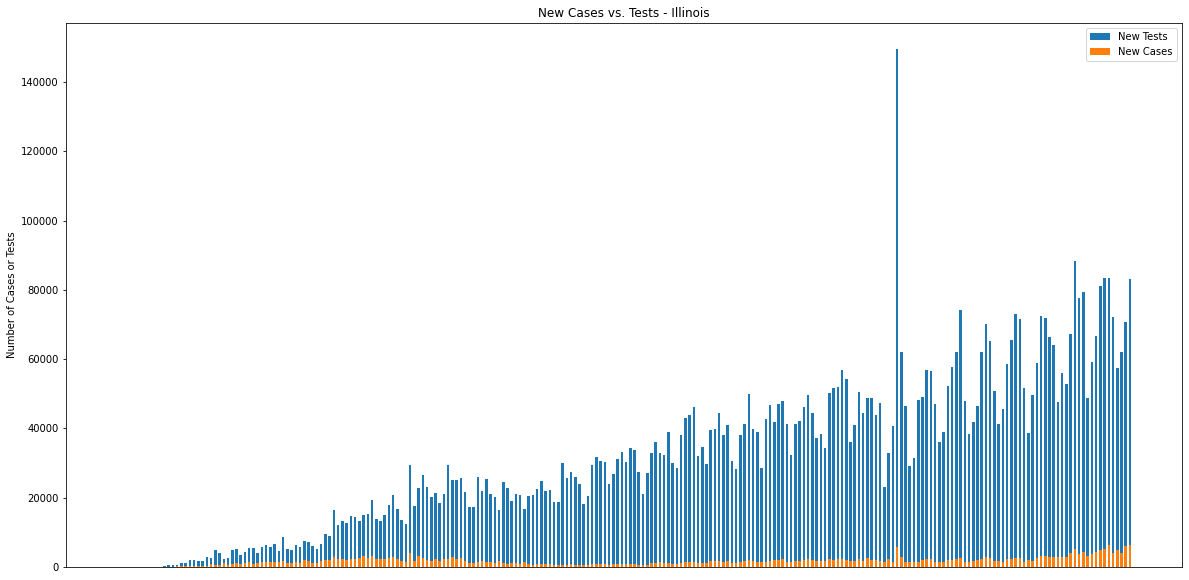

<Figure size 432x288 with 0 Axes>

In [11]:
import numpy as np
from matplotlib.dates import AutoDateLocator, AutoDateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,10))
width = .6

ax.bar(test_stats.date, test_stats.totalTestResultsIncrease, width, label='New Tests')
ax.bar(test_stats.date, test_stats.positiveIncrease, width, label="New Cases")
ax.set_ylabel("Number of Cases or Tests")
ax.set_title("New Cases vs. Tests - Illinois")

ax.legend()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


plt.show()
plt.savefig('cases_versus_tests.png')

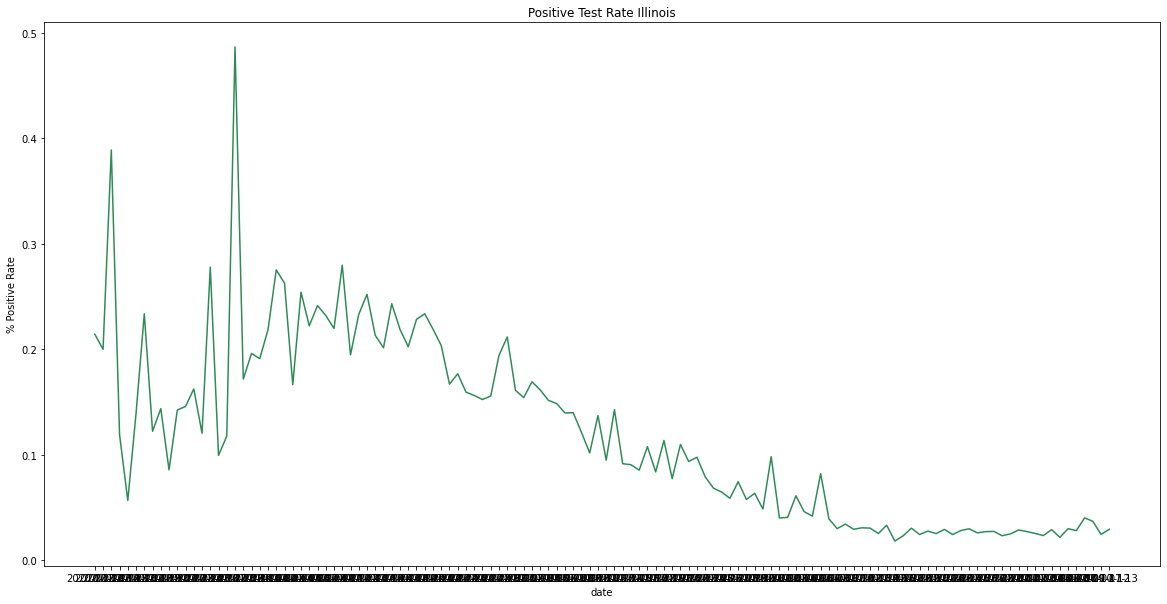

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure(figsize=(20,10))

sns.lineplot(x = test_stats["date"], y = test_stats['positiveIncrease']/test_stats['totalTestResultsIncrease'][8:132], 
                  color = "seagreen").set_title('Positive Test Rate Illinois')

plt.ylabel("% Positive Rate")
plt.show(fig)
plt.savefig('positive_rate.png')

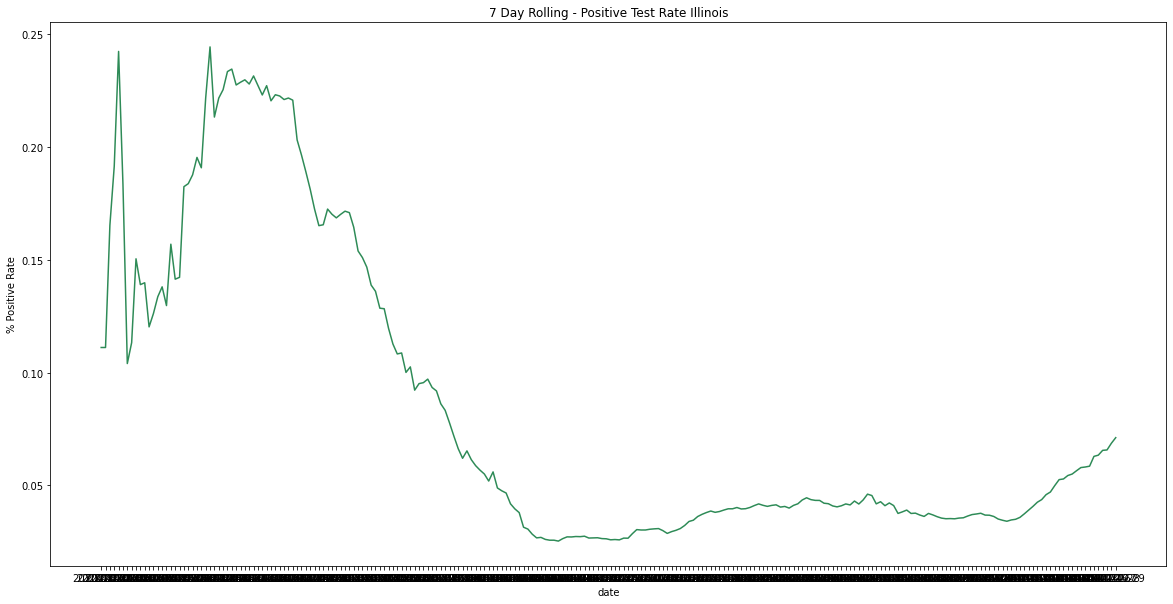

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(20,10))

sns.lineplot(x = test_stats["date"], 
             y =  test_stats['positiveIncrease'].rolling(7).mean()/test_stats['totalTestResultsIncrease'].rolling(7).mean(), 
                  color = "seagreen").set_title('7 Day Rolling - Positive Test Rate Illinois')

plt.ylabel("% Positive Rate")
plt.show(fig)
plt.savefig('positive_rate.png')

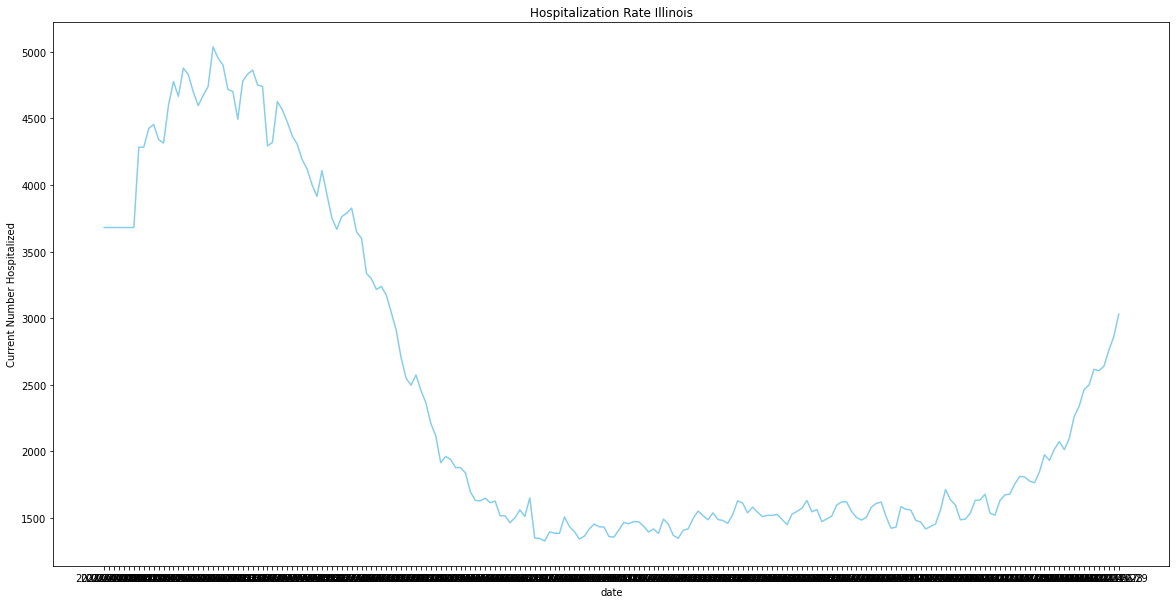

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(20,10))

sns.lineplot(x = test_stats["date"], y = test_stats["hospitalizedCurrently"], 
             color = "skyblue").set_title('Hospitalization Rate Illinois')

plt.ylabel("Current Number Hospitalized")
plt.show(fig)
plt.savefig('hospitalized.png')

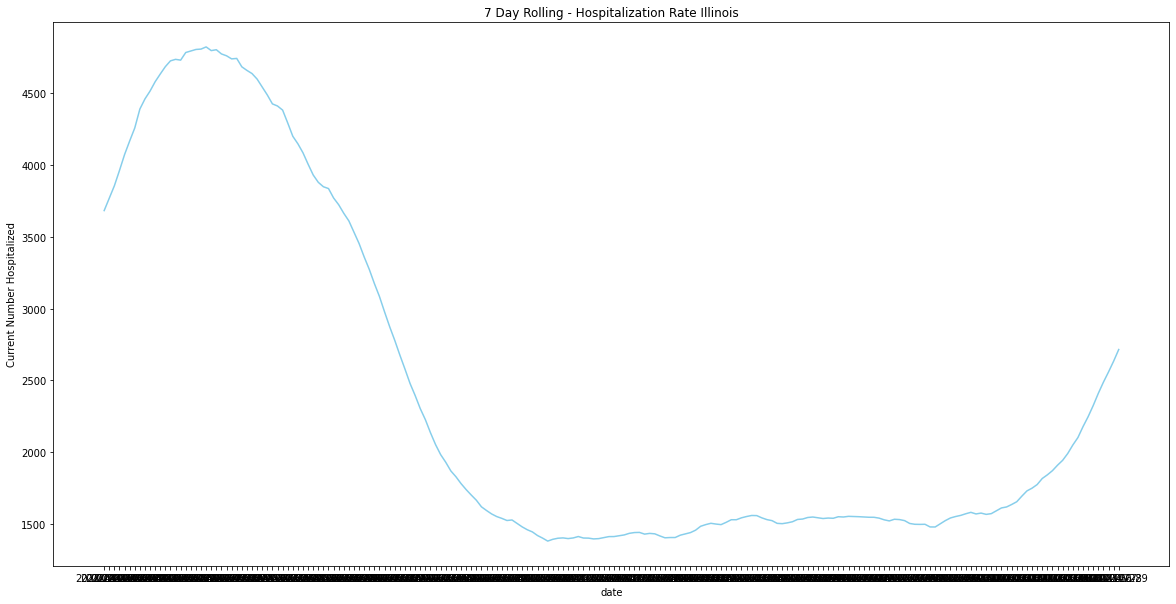

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure(figsize=(20,10))

sns.lineplot(x = test_stats["date"], y = test_stats["hospitalizedCurrently"].rolling(7).mean(), 
             color = "skyblue").set_title('7 Day Rolling - Hospitalization Rate Illinois')

plt.ylabel("Current Number Hospitalized")
plt.show(fig)
plt.savefig('hospitalized.png')

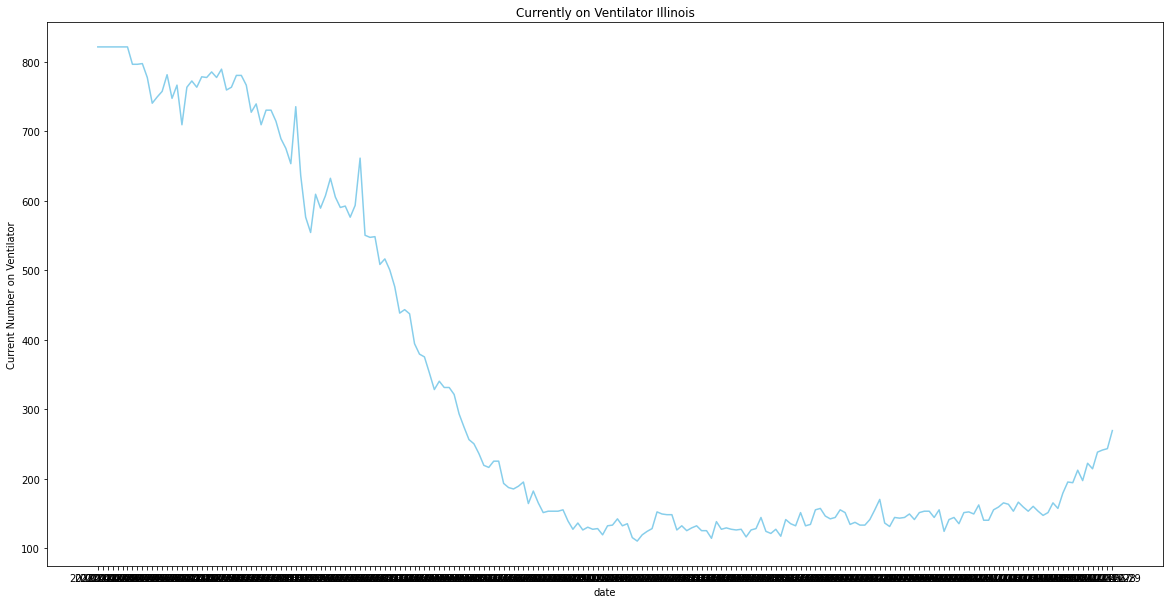

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure(figsize=(20,10))
fig = sns.lineplot(x = test_stats["date"], y = test_stats['onVentilatorCurrently'], 
             color = "skyblue").set_title('Currently on Ventilator Illinois')

plt.ylabel("Current Number on Ventilator")
plt.show(fig)
plt.savefig('ventilator.png')

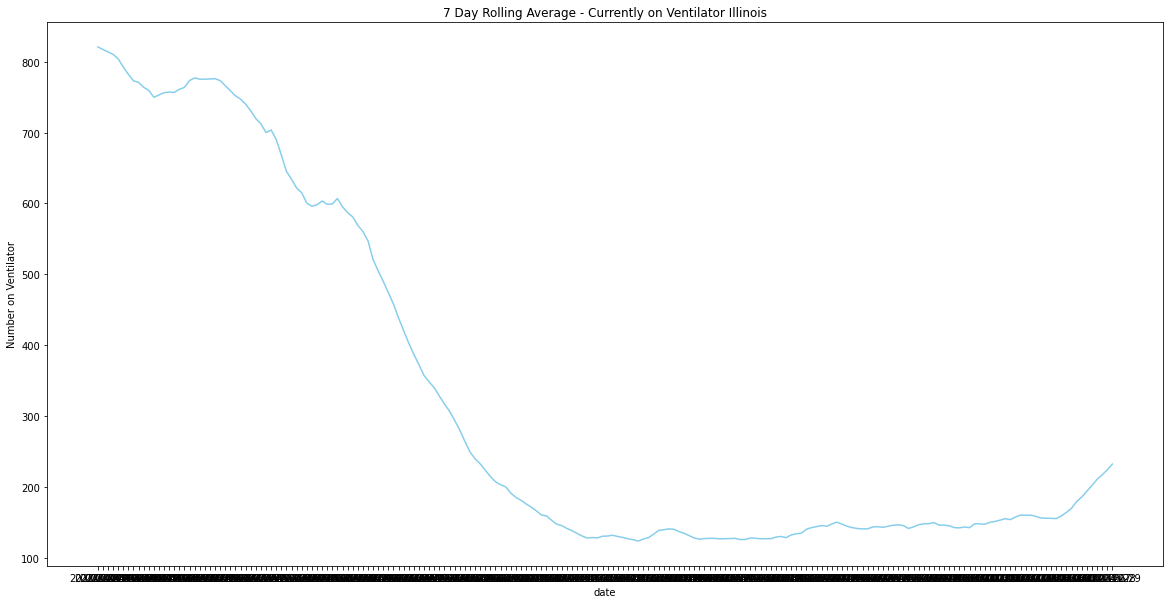

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(figsize=(20,10))
fig = sns.lineplot(x = test_stats["date"], y = test_stats['onVentilatorCurrently'].rolling(7).mean(), 
             color = "skyblue").set_title('7 Day Rolling Average - Currently on Ventilator Illinois')

plt.ylabel("Number on Ventilator")
plt.show(fig)
plt.savefig('ventilator.png')

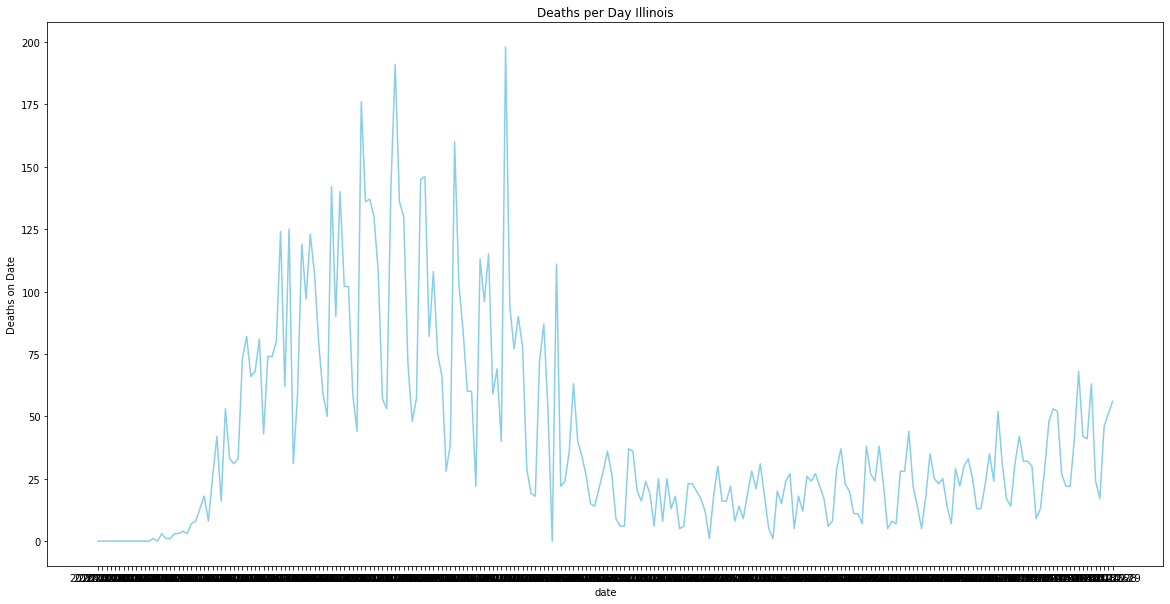

In [18]:
plt.figure(figsize=(20,10))
fig = sns.lineplot(x = test_stats["date"], y = test_stats['deathIncrease'], 
             color = "skyblue").set_title('Deaths per Day Illinois')

plt.ylabel("Deaths on Date")
plt.show(fig)

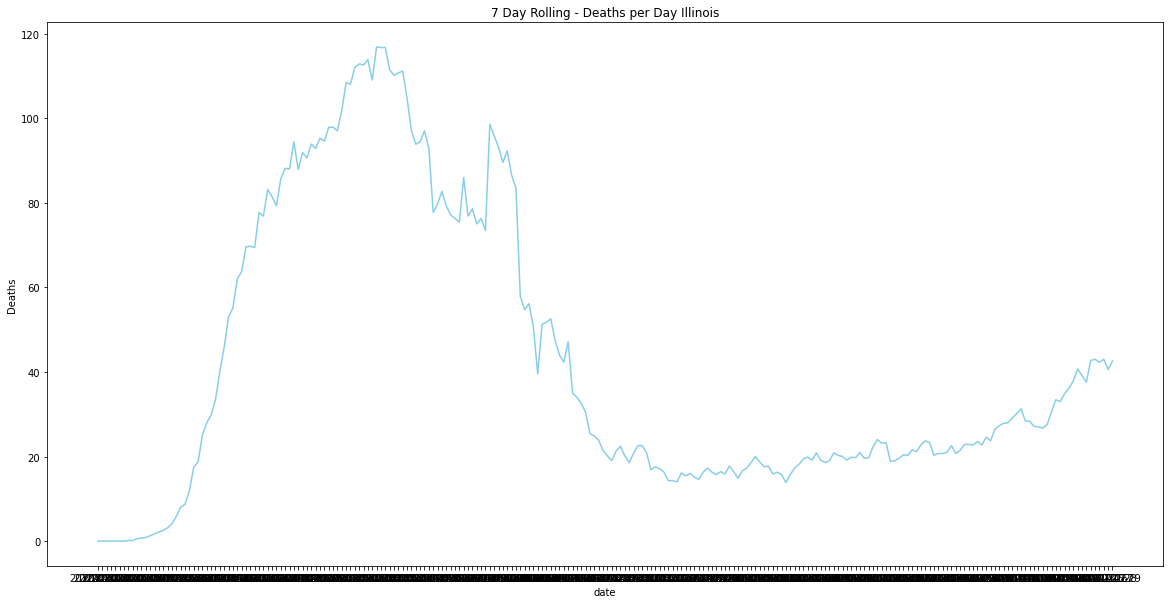

In [19]:
plt.figure(figsize=(20,10))
fig = sns.lineplot(x = test_stats["date"], y = test_stats['deathIncrease'].rolling(7).mean(), 
             color = "skyblue").set_title('7 Day Rolling - Deaths per Day Illinois')

plt.ylabel("Deaths")
plt.show(fig)